# TP1 : Histogramme et seuillage

Objectifs :

* Étudier la notion d’histogramme
* Extraire des caractéristiques (brillance, contraste…,) de l’image à partir de son histogramme
* Binariser une image par seuillage (manuel et automatique) de son histogramme
* Améliorer l’image par application de transformation sur son histogramme (étirement et égalisation)
* Mise en œuvre avec Python

Dans ce TP, nous allons travailler seulement avec des images en niveaux de gris où chaque niveau de gris est codé sur 1 octet. Il y a donc 256 niveaux de gris accessibles...

## Import des modules de base

Exécutez la cellule suivante afin d'importer les modules **Numpy**, **Matplotlib** et **OpenCV**. Cette cellule doit être exécutée à chaque fois que vous réinitialisez le _kernel_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## 1 Histogramme

L’histogramme d’une image indique le nombre de pixels existant pour chaque valeur. Calculer l’histogramme de l’image en niveaux de gris, c’est, en d’autres termes, compter combien il y a de pixels pour chaque nuance de gris.

**1.1** Complétez la fonction ```histogramme``` qui calcule, dans un vecteur de taille 256, l’histogramme d’une image en niveaux de gris ($n \in [0...255]$).
Quelques fonctions qui pourraient être utiles :
* _imread_ de **OpenCV** pour lire l’image,
* _zeros_ de **Numpy** pour initialiser à 0 le vecteur,
* _shape_ pour obtenir le nombre de lignes et de colonnes de l’image.

In [9]:
def histogramme(img):
    # Initialiser un vecteur de taille 256 à 0
    hist = np.zeros(256, dtype=int)
    
    # Obtenir les dimensions de l'image
    rows, cols = img.shape
    
    # Calculer l'histogramme
    for i in range(rows):
        for j in range(cols):
            hist[img[i, j]] += 1
    
    return hist

**1.2** Testez votre fonction sur les images _cellules.png_ et _irmCerveau.png_ affichées ci-dessous (téléchargées à partir de Moodle dans le même répertoire que ce notebook). 
Attention, même si visuellement les images ne semblent pas en couleur, elles peuvent être sur 3 canaux. Après avoir lu l’image en utilisant _cv.imread_, vérifiez que la variable est bien en 2 dimensions à l’aide de _shape_. Si non (3 dimensions), alors pour importer une image couleur en niveau de gris, il faut ajouter le paramètre _0_ dans la fonction _imread_ d’_opencv2_ : ```irm=cv.imread("irmCerveau.png",0)```

![Image](cellules.png) ![Image](irmCerveau.png)

In [10]:
# Chargez les images cellules.png et irmCerveau.png

cellules = cv.imread('cellules.png', cv.IMREAD_GRAYSCALE)
irm = cv.imread('irmCerveau.png', cv.IMREAD_GRAYSCALE)

# Testez les fonction histogramme sur ces deux images

hist_cellules = histogramme(cellules)
hist_irm = histogramme(irm)

**1.3** Affichez les histogrammes des deux images (fonction utile : _plot_ de _matplotlib.pyplot_). Commentez.

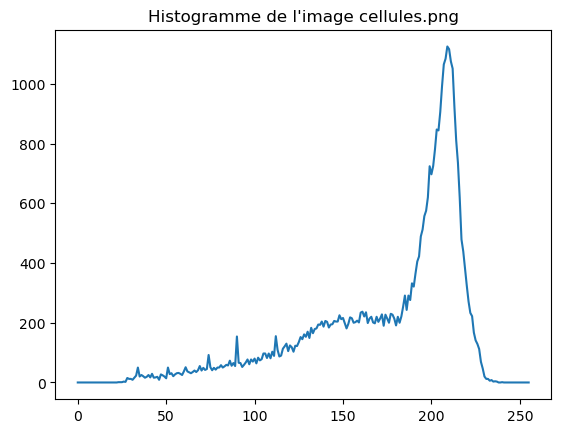

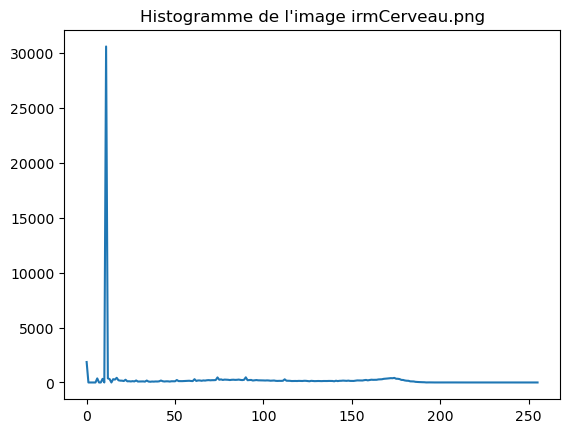

In [11]:
# Affichez les histogrammes

plt.figure()
plt.plot(hist_cellules)
plt.title('Histogramme de l\'image cellules.png')
plt.show()

plt.figure()
plt.plot(hist_irm)
plt.title('Histogramme de l\'image irmCerveau.png')
plt.show()

## 2 Histogramme cumulé

Le principe de l’histogramme cumulé (pas vu en amphi) est le même que pour l’histogramme, si ce n’est que pour toute valeur de niveau de gris $n$, on calcule non pas le nombre de pixels de cette valeur dans l’image, mais on cumule le nombre de pixels de valeur inférieure ou égale $n$ dans l’image.

**2.1** Ecrivez une fonction ```histogrammeCumule``` qui calcule, dans un vecteur de taille 256, l’histogramme cumulé de l’image.

In [12]:
def histogrammeCumule(img):
    # Initialiser un vecteur de taille 256 à 0
    hist = np.zeros(256, dtype=int)
    
    # Obtenir les dimensions de l'image
    rows, cols = img.shape
    
    # Calculer l'histogramme
    for i in range(rows):
        for j in range(cols):
            hist[img[i, j]] += 1
    
    # Calculer l'histogramme cumulé
    hist_cumule = np.zeros(256, dtype=int)
    hist_cumule[0] = hist[0]
    for i in range(1, 256):
        hist_cumule[i] = hist_cumule[i - 1] + hist[i]
    
    return hist_cumule

**2.2** Testez votre fonction sur les mêmes images que précédemment.

In [13]:
# Testez la fonction histogrammeCumule sur les deux images

hist_cumule_cellules = histogrammeCumule(cellules)
hist_cumule_irm = histogrammeCumule(irm)

**2.3** Trouvez le code permettant d'afficher les histogrammes cumulés. Vous devez obtenir des résultats similaires aux histogrammes ci-dessous.

![Image](hist_cell_culm.png) ![Image](hist_cerveau_culm.png)

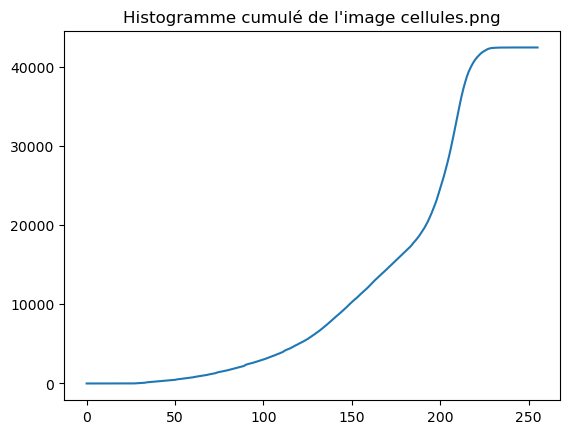

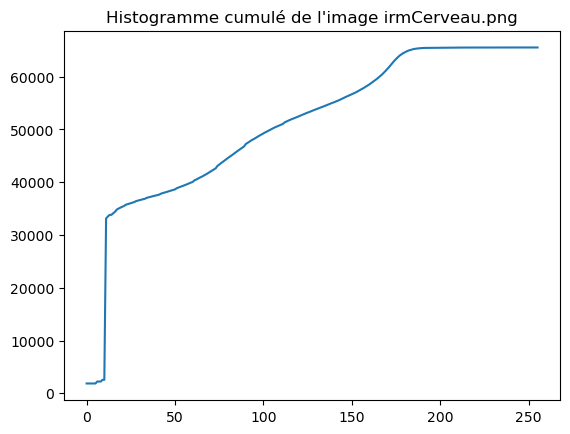

In [14]:
# Affichez les histogrammes cumulés

plt.figure()
plt.plot(hist_cumule_cellules)
plt.title('Histogramme cumulé de l\'image cellules.png')
plt.show()

plt.figure()
plt.plot(hist_cumule_irm)
plt.title('Histogramme cumulé de l\'image irmCerveau.png')
plt.show()

## 3 Seuillage manuel

Le seuillage d’image est une technique simple de binarisation d’image. Elle consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 0 ou 1. On parle alors d’une image binaire ou image en noir et blanc.
Pour cela, le seuillage d’image remplace un à un les pixels d’une image à l’aide d’une valeur de seuil fixée. Ainsi, si un pixel a une valeur supérieure ou égale au seuil, il prendra la valeur 255 (blanc), et si sa valeur est inférieure, il prendra la valeur 0 (noir).

$$imageBinaire(i,j) = 
\begin{cases}
255\ si\ image(i, j) \geq seuil \\
0\ sinon\\
\end{cases}
$$

**3.1** Ouvrez l’image _cellules.png_.

In [8]:
# A compléter...

**3.2** À l’aide de la fonction écrite précédemment, calculez et affichez l’histogramme de l’image.

In [9]:
# A compléter...

**3.3** Identifiez manuellement le seuil à appliquer pour extraire les noyaux du fond.

In [10]:
# A compléter...

**3.4** Réalisez le seuillage à l’aide de _seuil,output=cv.threshold(image,seuil,255,cv.THRESH_BINARY)_.

In [11]:
# A compléter...

**3.5** Vérifiez, en visualisant l’image obtenue, que le résultat est satisfaisant.

In [12]:
# A compléter...

## 4 Recadrage dynamique / Étirement d’histogramme

Plus la dynamique d’une image est étalée, meilleure est la qualité de l’image. Il est alors possible de modifier
cette dynamique en utilisant la transformation suivante :

$S(n) = round(M\frac{(n-a)}{(b-a)})$

où $n$ est le niveau de gris de chaque pixel l’image d’entrée, $a$ est le niveau de gris minimum dans l'image d'entrée, $b$ est le niveau de gris maximum dans l'image d'entrée, $M$ représente l’amplitude de l’image résultante, _i.e._ la dynamique souhaitée (en général $255$) et $round$ est la fonction qui arrondit au plus proche. Cette fonction est indispensable puisque nous travaillons dans un espace discret avec un nombre limité de niveaux de gris.

**Plus précisement, pour chaque pixel d'intensité $n$ de l'image originale, son niveau de gris deviendra $S(n)$ dans l'image résultante.**

**Important : l'image d'entrée est souvent du type *uint8*, ce qui peut donner des résultats erronés lors du calcul de $S(n)$. Pensez à effectuer des conversions de type avant le calcul de $S(n)$.**

**4.1** Lisez l’image ’evasion.png’ (affichée ci-dessous). À l’aide de la fonction écrite précédemment, calculez et affichez l’histogramme de l’image.

![Image](evasion.png)

In [13]:
# A completer...

**4.2** Modifiez sa dynamique en utilisant la transformation de recadrage dynamique (rappelée ci-dessus) afin d’obtenir une image plus contrastée (étirement de l’histogramme).

In [14]:
# A completer...

**4.3** Comparer les histogrammes ainsi que les valeurs moyennes et les écarts-types initiaux et finaux.

In [15]:
# A completer...

## 5 Égalisation d’histogramme

L’égalisation d’histogramme consiste à corriger une image qui manque de contraste : ses couleurs, ou ses niveaux de gris, se concentrent sur seulement quelques valeurs.

Cette transformation va faire une conversion de couleurs :
- afin d’utiliser toute l’étendue des niveaux ;
- afin d’avoir (à peu près) autant de pixels de chaque niveau.

Le principe de l’égalisation d’histogramme est d’utiliser l’histogramme cumulé de l’image comme une table de conversions des niveaux de gris. Pour cela, on normalise les valeurs de l’histogramme cumulé pour les ramener entre 0 et 255.
L’idée de la conversion est alors la suivante :
- Tous les faibles niveaux inutilisés dans l’image (de 0 à 120 environ dans l’exemple ci-dessous) seront ramenés
à 0 ;
- Tous les hauts niveaux inutilisés (d’environ 200 à 255 dans l’exemple ci-dessous) seront ramenés à 255 ;
- Les seuls niveaux utilisés seront étalés entre 0 et 255 suivant la progression de l’histogramme cumulé (tout un niveau étant déplacé vers un nouveau niveau, ce qui intercalera des ”trous” de niveaux non utilisés dans l’image finale).

En pratique, étant donné une image $I$, il suffit d'implémenter les opérations suivantes :

$HC_{norm}[n] = round((\frac{HC[n]}{max(HC)}) \times 255)$ pour tous les niveaux de gris $n$ dans l'intervalle $[0,255]$

$I_{egalisee}[i,j] = HC_{norm}[I[i,j]]$

Où $HC$ représente l'histogramme cumulé de l'image $I$, et $I_{egalisee}[i,j]$ correspond au niveau de gris du pixel dans la ligne $i$ et colonne $j$ de l'image résultante.

Exemple :

![Image](bay.png) ![Image](bay_hist.png)

**Gauche** : Hawke’s Bay : image peu contrastée ; **Droite** : Histogramme correspondant (en rouge) et
histogramme cumulé (en noir et normalisé en échelle pour l’affichage)

![Image](bay_egalisee.png) ![Image](bay_egalisee_hist.png)

**Gauche** : image mieux contrastée grâce à l’égalisation de son histogramme ; **Droite** : Le nouvel histogramme
correspondant (en rouge, démontrant l’utilisation de toute l’étendue de la dynamique des niveaux du noir au blanc),
ainsi que l’histogramme cumulé (en noir, démontrant la répartition plus régulière)

**5.1** Écrivez une fonction ```egalisationHistogramme``` qui met en œuvre le principe précédent pour égaliser l’histogramme d’une image en niveaux de gris afin d’en améliorer le contraste.

In [19]:
def egalisationHistogramme(img):
    # A completer...
    return 0 # A remplacer par l'image apres l'egalisation d'histogramme

**5.2** Testez votre fonction sur l'image "bay.png". Vérifiez que l'image résultante, ainsi que son histogramme et son histogramme cumulé, correspondent aux figures affichées ci-dessus.

In [20]:
# A completer

**5.2** Ouvrez l’image ’pneu.png’. Vérifiez que son histogramme est resserré dans les valeurs faibles. Calculez et affichez l’histogramme cumulé de cette image. Appliquer un recadrage dynamique par étirement d’histogramme (comme vu précédemment sur l’image evasion.png) a-t-il un sens pour cette image pneu ? Pourquoi ?

In [17]:
# A completer

**5.3** À l’aide de la fonction ```egalisationHistogramme``` écrite auparavant, transformez l’image en une image équivalente, mais ayant un histogramme égalisé. Comparez les histogrammes et histogrammes cumulés initiaux et finaux.

In [18]:
# A completer